classic Linear Regression, such a cool name for something so trivial. I learnt minibatch SGD and back propagation so thanks?


In [2]:
import random
import numpy as np
import torch

seed = 42

random.seed(seed)           # Python's random
np.random.seed(seed)        # NumPy
torch.manual_seed(seed)     # PyTorch

In [3]:
def prepare_data(datapointCount, dataDimension, trueWeight,trueBias):
    inputData = torch.rand(size=(dataDimension,datapointCount))+torch.randint(-10,10,size=(dataDimension,datapointCount))
    augmentedInput=torch.cat((inputData,torch.ones(size=(1,datapointCount))),dim=0)
    augmentedWeight=torch.cat((trueWeight,trueBias),dim=0)
    trueOutput = torch.matmul(augmentedInput.T,augmentedWeight.T)
    noisyOutput = trueOutput
    print(trueOutput.shape,augmentedInput.T.shape,augmentedWeight.shape,noisyOutput.shape)
    return augmentedInput,noisyOutput
    

In [4]:
from random import randint
class LinearRegressionWithMinibatchSGD:
    def __init__(self):
        #hyperparameters
        self.epochCount = 10000
        self.batchSize = 20
        self.learningRate = 0.01
        self.datapointCount = 1000
        self.dataDimension = 10
        self.loss = []
        #prepared_data
        self.trueWeight = torch.rand(size=(self.dataDimension,))+torch.randint(-15,15,size=(self.dataDimension,))
        self.trueBias = torch.randint(-20,20,size=(1,))*torch.rand(size=(1,))
        self.input,self.noisyOutput = prepare_data(self.datapointCount, self.dataDimension, self.trueWeight, self.trueBias)
        #initialized data
        self.weight = torch.rand(size=(self.dataDimension+1,))+torch.randint(-15,15,size=(self.dataDimension+1,))
        self.weight.requires_grad=True
        self.output = torch.rand(size=(self.dataDimension+1,))+torch.randint(-15,15,size=(self.dataDimension+1,))
    def loss_function(self,index):
        return torch.norm((torch.matmul(self.input[:,index].T,self.weight)-self.noisyOutput[index]),p=2)
    def loss_function2(self):
        return torch.norm((torch.matmul(self.input.T,self.weight)-self.noisyOutput),p=2)/self.datapointCount
    def minibatchSGD(self):
        for i in range(self.epochCount):
            
            batch_gradient = 0
            for j in range(self.batchSize):
                index = randint(0,self.datapointCount-1)
                self.loss_function(index).backward()    
            batch_gradient+=self.weight.grad
            self.weight.grad.zero_()
            with torch.no_grad():
                self.weight-=self.learningRate/self.batchSize*batch_gradient
            if (i+1)%100 == 0:
                self.loss.append(self.loss_function2().item())
            
    



In [5]:
t = LinearRegressionWithMinibatchSGD()


torch.Size([1000]) torch.Size([1000, 11]) torch.Size([11]) torch.Size([1000])


C:\Users\admin\AppData\Local\Temp\ipykernel_2448\835320033.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4416.)
  trueOutput = torch.matmul(augmentedInput.T,augmentedWeight.T)


In [ ]:
t.minibatchSGD()

: 

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 10001,100))

plt.plot(epochs, t.loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
t.weight

tensor([ 13.8747, -10.0709,   5.3696,   9.9524,   6.4039,   7.6002,  -9.7400,
         10.8017,  12.9368,   1.1560,   3.9811], requires_grad=True)

In [ ]:
t.trueWeight

tensor([ 13.8823, -10.0850,   5.3829,   9.9593,   6.3904,   7.6009,  -9.7434,
         10.7936,  12.9408,   1.1332])

In [ ]:
t.input

tensor([[-7.7031,  6.8317,  6.1053,  ..., -2.2224, -3.9657, -7.6908],
        [-5.9298,  6.1836,  8.7785,  ...,  6.5462, -7.3704, -4.5471],
        [-7.1570,  9.2085, -1.3208,  ..., -1.3500,  0.1243,  9.2002],
        ...,
        [-4.6709, -9.5917, -9.5261,  ..., -2.0793,  4.6488, -3.0942],
        [-9.2577,  1.5909,  8.4040,  ..., -1.1152,  8.3679, -0.5938],
        [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]])

In [ ]:
t.loss_function2()

tensor(0.0065, grad_fn=<DivBackward0>)

In [ ]:
import torch
import random

# Reproducibility
torch.manual_seed(42)
random.seed(42)

# Data Preparation
def prepare_data(datapointCount, dataDimension, trueWeight, trueBias):
    inputData = torch.rand(dataDimension, datapointCount) + torch.randint(-10, 10, (dataDimension, datapointCount))
    augmentedInput = torch.cat((inputData, torch.ones(1, datapointCount)), dim=0)
    augmentedWeight = torch.cat((trueWeight, trueBias), dim=0)
    trueOutput = torch.matmul(augmentedWeight, augmentedInput)
    noise = torch.rand_like(trueOutput) * torch.randint(-2, 2, trueOutput.shape)
    noisyOutput = trueOutput + noise
    return augmentedInput, noisyOutput

# Linear Regression with Mini-batch SGD
class LinearRegressionWithMinibatchSGD:
    def __init__(self):
        # Hyperparameters
        self.epochCount = 500
        self.batchSize = 20
        self.learningRate = 0.01
        self.datapointCount = 1000
        self.dataDimension = 10
        
        # True parameters
        self.trueWeight = torch.rand(self.dataDimension) + torch.randint(-15, 15, (self.dataDimension,))
        self.trueBias = torch.rand(1) * torch.randint(-20, 20, (1,))
        
        # Data
        self.input, self.noisyOutput = prepare_data(
            self.datapointCount, self.dataDimension,
            self.trueWeight, self.trueBias
        )
        
        # Model parameters
        self.weight = torch.randn(self.dataDimension + 1, requires_grad=True)

    def loss_function(self, predictions, targets):
        return torch.nn.functional.mse_loss(predictions, targets)

    def minibatchSGD(self):
        for epoch in range(self.epochCount):
            total_loss = 0
            for _ in range(self.datapointCount // self.batchSize):
                indices = random.sample(range(self.datapointCount), self.batchSize)
                batch_input = self.input[:, indices]  # (D+1, B)
                batch_target = self.noisyOutput[indices]  # (B,)
                
                predictions = self.weight @ batch_input  # (B,)
                loss = self.loss_function(predictions, batch_target)
                loss.backward()

                with torch.no_grad():
                    self.weight -= self.learningRate * self.weight.grad
                self.weight.grad.zero_()

                total_loss += loss.item()
            if epoch % 50 == 0 or epoch == self.epochCount - 1:
                avg_loss = total_loss / (self.datapointCount // self.batchSize)
                print(f"Epoch {epoch}, Loss: {avg_loss:.4f}")

# Run it
model = LinearRegressionWithMinibatchSGD()
model.minibatchSGD()
model.weight


Epoch 0, Loss: 904.3119
Epoch 50, Loss: 0.5754
Epoch 100, Loss: 0.5462
Epoch 150, Loss: 0.5535
Epoch 200, Loss: 0.6128
Epoch 250, Loss: 0.6346
Epoch 300, Loss: 0.5881
Epoch 350, Loss: 0.5792
Epoch 400, Loss: 0.5264
Epoch 450, Loss: 0.5936
Epoch 499, Loss: 0.5630


tensor([ 13.8868, -10.0964,   5.3928,   9.9843,   6.4152,   7.6253,  -9.7268,
         10.7916,  12.9397,   1.1343,   4.0873], requires_grad=True)

In [ ]:
t.weight,t.trueWeight

(tensor([ 13.8747, -10.0709,   5.3696,   9.9524,   6.4039,   7.6002,  -9.7400,
          10.8017,  12.9368,   1.1560,   3.9811], requires_grad=True),
 tensor([ 13.8823, -10.0850,   5.3829,   9.9593,   6.3904,   7.6009,  -9.7434,
          10.7936,  12.9408,   1.1332]))

In [ ]:
t.weight=model.weight
t.loss_function2()

tensor(0.0099, grad_fn=<DivBackward0>)

In [ ]:
a= torch.arange(1,31).reshape(5,6)

In [ ]:
a

tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29, 30]])

In [ ]:
a[:,(3,5)]

tensor([[ 4,  6],
        [10, 12],
        [16, 18],
        [22, 24],
        [28, 30]])

: 

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 1. Generate synthetic data
def generate_data(n_samples=1000, input_dim=1, noise_std=1.0):
    X = torch.randn(n_samples, input_dim)
    true_weights = torch.tensor([[3.0]])
    true_bias = 2.0
    y = X @ true_weights + true_bias + noise_std * torch.randn(n_samples, 1)
    return X, y

# 2. Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# 3. Training loop
def train(model, dataloader, criterion, optimizer, epochs=100):
    for epoch in range(epochs):
        for x_batch, y_batch in dataloader:
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 4. Main
def main():
    # Data preparation
    X, y = generate_data()
    dataset = TensorDataset(X, y)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    # Model, loss, optimizer
    model = LinearRegressionModel(input_dim=1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # Training
    train(model, dataloader, criterion, optimizer, epochs=100)

    # Show learned parameters
    print("Learned weight:", model.linear.weight.item())
    print("Learned bias:", model.linear.bias.item())

    # Visualization (optional for 1D input)
    with torch.no_grad():
        plt.scatter(X, y, label="Data", alpha=0.3)
        predicted = model(X)
        plt.plot(X, predicted, color="red", label="Fitted line")
        plt.legend()
        plt.title("Linear Regression Fit")
        plt.show()

if __name__ == "__main__":
    main()


Epoch [10/100], Loss: 1.1270
Epoch [20/100], Loss: 1.7483
Epoch [30/100], Loss: 1.5354
Epoch [40/100], Loss: 0.6386
Epoch [50/100], Loss: 1.5537
Epoch [60/100], Loss: 0.6115
Epoch [70/100], Loss: 1.3558
Epoch [80/100], Loss: 0.9340
Epoch [90/100], Loss: 0.7140
Epoch [100/100], Loss: 0.2935
Learned weight: 3.0151071548461914
Learned bias: 1.9922778606414795


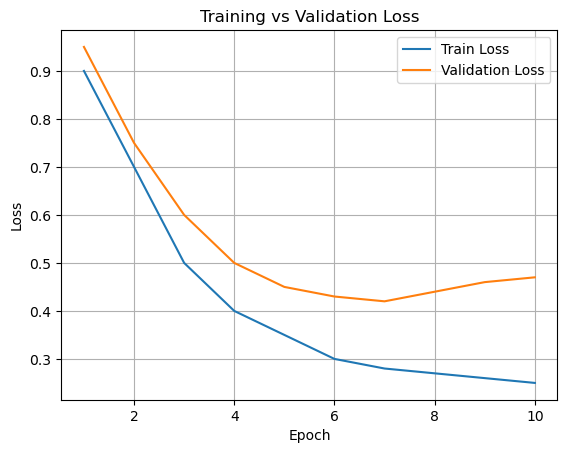

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))
train_loss = [0.9, 0.7, 0.5, 0.4, 0.35, 0.3, 0.28, 0.27, 0.26, 0.25]
val_loss   = [0.95, 0.75, 0.6, 0.5, 0.45, 0.43, 0.42, 0.44, 0.46, 0.47]

plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

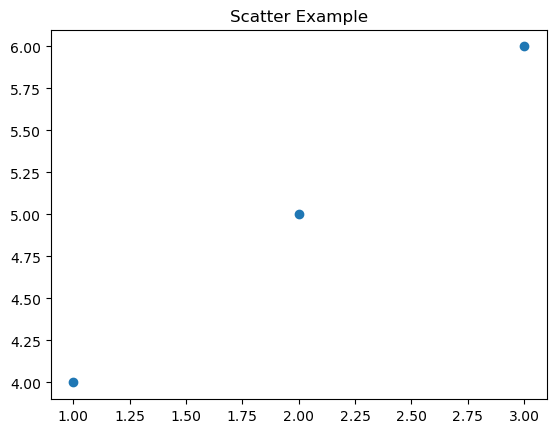

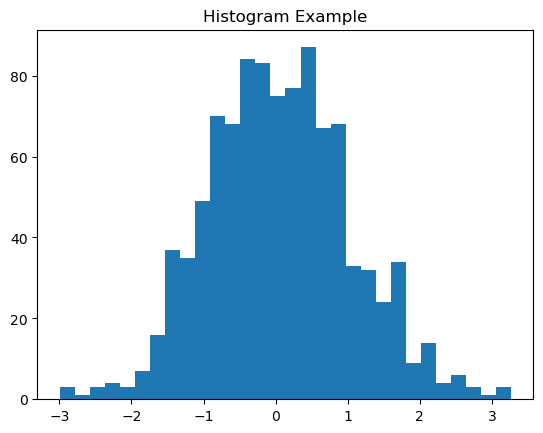

In [ ]:
# Scatter plot
plt.scatter([1, 2, 3], [4, 5, 6])
plt.title("Scatter Example")
plt.show()

# Histogram
import numpy as np
data = np.random.randn(1000)
plt.hist(data, bins=30)
plt.title("Histogram Example")
plt.show()
